In [6]:
import numpy as np
import matplotlib.pyplot as plt
from generate_placement_data import get_data
from hdimvis.visualise_layouts_and_metrics.plot import show_layout


In [14]:
parents, parent_hd_distances, sample_ld_pos, r, dims, data, sample, sample_indx, layout = get_data('rna N3k')

####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################
####################
The algorithm will use a random initialization for the low D embedding/layout
####################
A 2D layout of the "sample" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: euclidean
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.1 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


In [15]:
print(sample_ld_pos.shape)

(54, 2)


C:\Users\Owner\Desktop\2095736w\hdimvis\visualise_layouts_and_metrics\plot.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, alpha=alpha, s=size, c=colors, cmap=cmap)


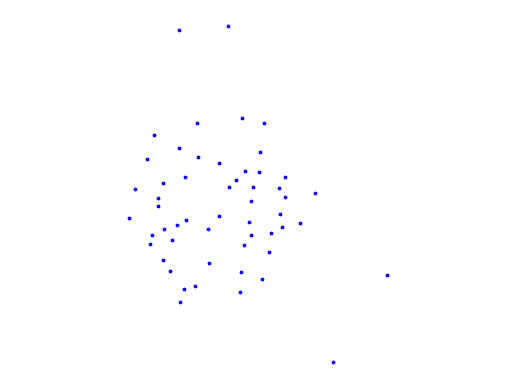

This is the layout (2D embedding) of the sample


In [16]:
show_layout(layout)
print("This is the layout (2D embedding) of the sample")


In [21]:
#the point whose parent we will consider:
point_idx = np.random.randint(0, r)


C:\Users\Owner\AppData\Local\Temp\ipykernel_27980\517790421.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


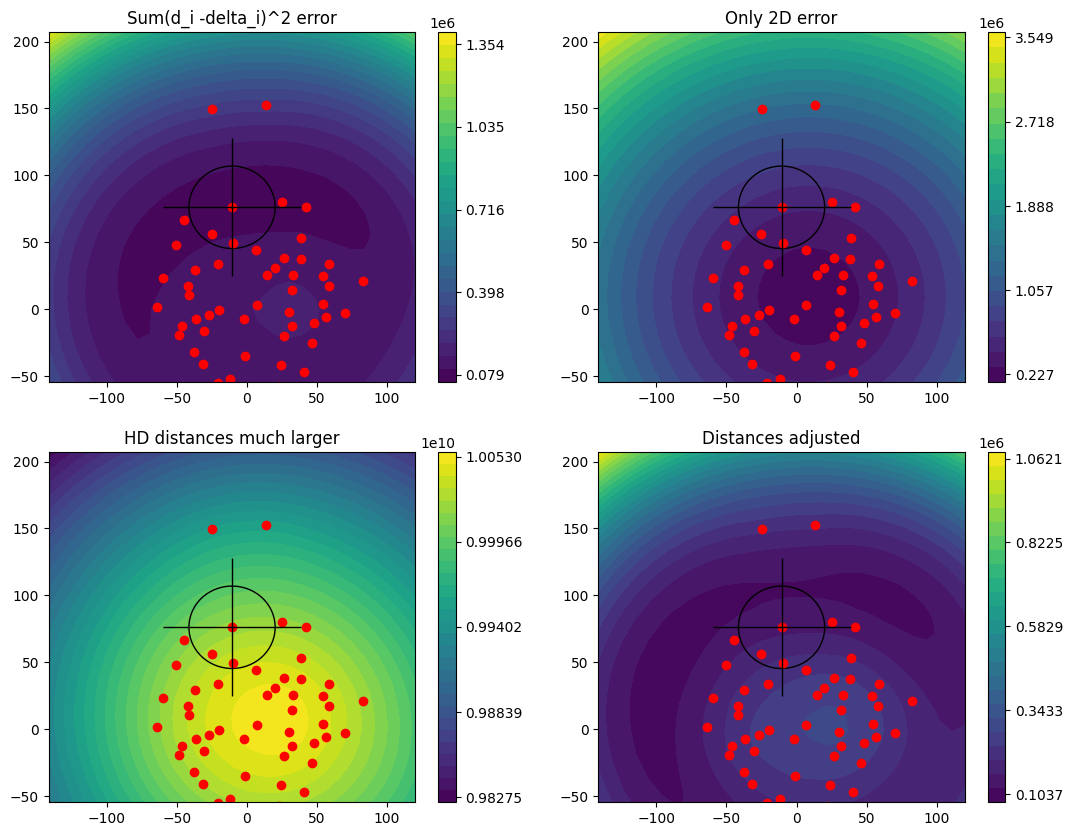

In [22]:
#adjust the size of the plot to include more ore fewer sample points here:
extra_space = 100
the_point_hd = data[point_idx]
the_parent_indx = parents[point_idx]

radius = parent_hd_distances[point_idx]
the_parent = sample_ld_pos[the_parent_indx]




#calculate the error function
x = np.linspace( the_parent[0] - radius - extra_space, the_parent[0] + radius + extra_space,30)
y = np.linspace( the_parent[1] - radius - extra_space, the_parent[1] + radius + extra_space,30)

grid_size_x = x.size
grid_size_y = y.size

xv, yv = np.meshgrid(x, y)

hd_dist= np.linalg.norm(sample - the_point_hd, axis=1)

ld_dist = np.zeros((grid_size_x,grid_size_y, sample.shape[0]))

for i in range(sample_ld_pos.shape[0]):
    xy =  np.dstack((xv - sample_ld_pos[i, 0], yv - sample_ld_pos[i, 1]))
    distance_one_p = np.linalg.norm(xy, axis=2)
    ld_dist[... ,i] = distance_one_p

diffs = (ld_dist - hd_dist[None, None,:])



#plot
fig, axes = plt.subplots(2,2, figsize=(13, 10))
# fig.tight_layout()
((ax1, ax2),(ax3, ax4)) = axes


errors = []
titles =[]

#orignal error
original_error = np.sum(diffs**2, axis=2)
errors.append(original_error)
titles.append('Sum(d_i -delta_i)^2 error')

#just 2d error
just_low_d_error = np.sum(ld_dist**2, axis=2)
errors.append(just_low_d_error)
titles.append('Only 2D error')

# hd distances much larger (squared) than 2d distances
diffs_exaggerated_hd = (ld_dist - hd_dist[None, None,:]**2)
error_exaggerated_hd =  np.sum(diffs_exaggerated_hd**2, axis=2)
errors.append(error_exaggerated_hd)
titles.append('HD distances much larger')

#adjusted weight
diffs_adjusted = (ld_dist - hd_dist[None, None,:]*1.2)
error_adjusted=  np.sum(diffs_adjusted**2, axis=2)
errors.append(error_adjusted)
titles.append('Distances adjusted')
contours = None



for i in range(4):
    ax = axes.flat[i]
    circle = plt.Circle((the_parent[0], the_parent[1]), radius, color='black', fill = False)
    contours = ax.contourf(x, y, errors[i], levels =30)
    cbar_ticks = np.linspace(errors[i].min(), errors[i].max(), 5)
    fig.colorbar(contours,  ax=ax, orientation='vertical',
             location='right', shrink=1, ticks=cbar_ticks)
    ax.autoscale(False)
    ax.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
    ax.plot(the_parent[0], the_parent[1], color='black', marker='+', markersize=100, markeredgewidth='1' )
    ax.add_patch(circle)
    ax.set_title(titles[i])


# a colorbar which applies only to the original error image - the range of values differs too
#    much to use a single colorbar

fig.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_27980\2251630263.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


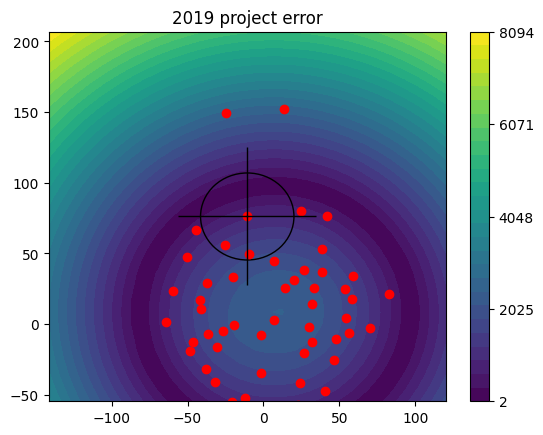

In [23]:
fig, ax = plt.subplots()

#  2019 project calculation
error_2019 = np.abs(np.sum(ld_dist, axis=2) - np.sum(hd_dist[None, None,:], axis=2))

circle = plt.Circle((the_parent[0], the_parent[1]), radius, color='black', fill = False)
contours = ax.contourf(x, y, error_2019, levels =30)
cbar_ticks = np.linspace(error_2019.min(), error_2019.max(), 5)
fig.colorbar(contours,  ax=ax, orientation='vertical',
         location='right', shrink=1, ticks=cbar_ticks)
ax.autoscale(False)
ax.plot(sample_ld_pos[:,0],sample_ld_pos[:,1], 'ro')
ax.plot(the_parent[0], the_parent[1], color='black', marker='+', markersize=100, markeredgewidth='1' )
ax.add_patch(circle)
ax.set_title('2019 project error')
fig.show()
